<a href="https://colab.research.google.com/github/SBShimm/Datathon/blob/main/Visual_Flix_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#cd /content/Datathon
#! git clone https://github.com/SBShimm/Datathon.git

/content/Datathon


# 1. 데이터 가져오기
#### 1) 데이터 합치기
- 넷플릭스 기존 데이터와 별점이 들어있는 데이터를 합침

In [24]:
netflix = pd.read_csv('/content/Datathon/Datathon/Dataset/netflix_titles.csv')
imdb = pd.read_csv('/content/Datathon/Datathon/Dataset/netflix_imdb.csv')

In [31]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
imdb.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [25]:
imdb_join = imdb[['Title', 'Imdb Score']]
imdb_join.columns = ['title', 'Imdb'] #문자 통합

imdb_join['IMDB'] = imdb_join.Imdb.str.extract(r'(\d+.\d+)') #정규표현식 이용
del imdb_join['Imdb']

In [26]:
imdb_join.head()

,title,IMDB
0,(Un)Well,6.6
1,#Alive,6.2
2,#AnneFrank - Parallel Stories,6.4
3,#blackAF,6.6
4,#cats_the_mewvie,5.1


In [27]:
data_join = pd.merge(left=netflix, right=imdb_join, how='left', on='title')
data_join.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [28]:
data_join.to_csv('Netflix_IMDB.csv')

In [29]:
file_dir = '/content/Datathon/Datathon/Dataset/Netflix_IMDB.csv'

data = pd.read_csv(file_dir)

In [30]:
data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


# 2. Data 전처리

#### 1)Year, Month Data 추출
- year과 month를 사용하기 위해 year, month, day를 추출함

In [33]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [34]:
# data에서 년, 월, 일 추출
data['year'] = data.date_added.apply(lambda x : x.year)
data['month'] = data.date_added.apply(lambda x : x.month)
data['day'] = data.date_added.apply(lambda x : x.day)

#년월일 int로 변경
data['year'] = pd.to_datetime(data['year']).astype(np.int64)
data['month'] = pd.to_datetime(data['month']).astype(np.int64)
data['day'] = pd.to_datetime(data['day']).astype(np.int64)
data.drop(data.loc[data['year']<0].index, inplace=True)

data.head(3)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,year,month,day
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4,2021,9,25
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3,2021,9,24
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,2021,9,24


In [35]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2))) #결측치 확인

director's null rate :29.87%
cast's null rate :9.34%
country's null rate :9.51%
rating's null rate :0.05%
duration's null rate :0.03%
IMDB's null rate :39.98%


imdb 데이터가 다른 곳에서 불러와서 매칭이 잘 안됨
결측치 제거 후 사용할 예정

#### 2)Country data 전처리

In [38]:
data['first_country'] = data.country.str.extract(r'([a-zA-Z\s]+)')

In [39]:
data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,year,month,day,first_country
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4,2021,9,25,United States
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3,2021,9,24,South Africa
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,2021,9,24,NaN
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,2021,9,24,NaN
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2021,9,24,India


#### 3)장르별 dataframe 나누기

In [40]:
df_tv = data[data["type"] == "TV Show"]
df_movie = data[data["type"] == "Movie"]

#### 4) 장르별 작품 counting

In [41]:
def genere(df):

    genere = df.listed_in.value_counts()
    gener = {}
    
    for idx, val in genere.items():
        l = idx.split(',')
        for i in l:
            i = i.strip()
            if i in gener.keys():
                d = {}
                d[i] = val + gener[i]
                gener.update(d)
            else:
                d = {i:val}
                gener.update(d)
    theme, count = [],[]
    
    for idx, val in gener.items():
        theme.append(idx)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genere':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp

In [42]:
tv_genere = genere(df_tv)
tv_genere

,genere,count
0,TV Shows,16
1,Classic & Cult TV,26
2,Stand-Up Comedy & Talk Shows,56
3,TV Thrillers,59
4,Teen TV Shows,69
5,TV Horror,76
6,TV Sci-Fi & Fantasy,84
7,Science & Nature TV,92
8,TV Mysteries,101
9,Korean TV Shows,155


In [43]:
mov_genere = genere(df_movie)
mov_genere

,genere,count
0,Movies,58
1,Faith & Spirituality,66
2,Cult Movies,71
3,Anime Features,71
4,LGBTQ Movies,103
5,Classic Movies,116
6,Sports Movies,220
7,Sci-Fi & Fantasy,245
8,Stand-Up Comedy,343
9,Horror Movies,358


#### 5) 별점 data 전처리

In [44]:
df_rating = data.sort_values(by = 'IMDB',ascending=False)
df_rating.head(20)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,year,month,day,first_country
6010,6010,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,2013-08-02,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4,2013,8,2,United States
2558,2558,s2520,TV Show,Avatar: The Last Airbender,NaN,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,2020-05-15,2007,TV-Y7,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,9.3,2020,5,15,United States
3119,3119,s3072,TV Show,Reply 1988,NaN,"Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...",South Korea,2020-01-01,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Take a nostalgic trip back to the late 1980s t...,9.2,2020,1,1,South Korea
688,688,s681,TV Show,The Last Dance,NaN,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2021-06-19,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.2,2021,6,19,United States
3995,3995,s3939,TV Show,Our Planet,NaN,David Attenborough,"United States, United Kingdom",2019-04-05,2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,9.2,2019,4,5,United States
1915,1915,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu...",9.1,2020,10,4,United States
3431,3431,s3382,TV Show,The Untamed,NaN,"Sean Xiao, Wang Yibo, Zoey Meng, Xuan Lu, Yu B...",China,2019-10-25,2019,TV-14,1 Season,"International TV Shows, TV Action & Adventure,...","In a magical world of inter-clan rivalry, two ...",9.1,2019,10,25,China
7365,7365,s7296,TV Show,Leyla and Mecnun,Onur Ünlü,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,2017-04-15,2014,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...,9.1,2017,4,15,Turkey
1781,1781,s1756,TV Show,Leah Remini: Scientology and the Aftermath,NaN,"Leah Remini, Mike Rinder",United States,2020-11-01,2018,TV-14,3 Seasons,Docuseries,Former Scientology members share detailed acco...,9.0,2020,11,1,United States
5163,5163,s5097,TV Show,Fullmetal Alchemist: Brotherhood,Yasuhiro Irie,"Romi Park, Rie Kugimiya, Megumi Takamoto, Shin...",Japan,2018-01-01,2010,TV-14,5 Seasons,"Anime Series, International TV Shows",After both suffer physical damage – brothers E...,9.0,2018,1,1,Japan


In [45]:
#별점 구간화 위한 데이터 추출
df_temp = df_rating[['show_id','type','listed_in','IMDB']]
df_temp

,show_id,type,listed_in,IMDB
6010,s5941,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",9.4
2558,s2520,TV Show,"Classic & Cult TV, Kids' TV, TV Action & Adven...",9.3
3119,s3072,TV Show,"International TV Shows, Korean TV Shows, Roman...",9.2
688,s681,TV Show,Docuseries,9.2
3995,s3939,TV Show,"Docuseries, Science & Nature TV",9.2
...,...,...,...,...
8871,s8802,Movie,"Dramas, International Movies, Thrillers",NaN
8872,s8803,Movie,"Cult Movies, Dramas, Thrillers",NaN
8873,s8804,TV Show,"Kids' TV, Korean TV Shows, TV Comedies",NaN
8875,s8806,Movie,"Children & Family Movies, Comedies",NaN


In [46]:
#소수점 데이터를 구간화시켜 1~10까지 나눔 
df_temp['IMDB_band']=0
df_temp.loc[df_temp['IMDB']<=1, 'IMDB_band']=1
df_temp.loc[(df_temp['IMDB']>1)&(df_temp['IMDB']<=2),'IMDB_band']=2
df_temp.loc[(df_temp['IMDB']>2)&(df_temp['IMDB']<=3),'IMDB_band']=3
df_temp.loc[(df_temp['IMDB']>3)&(df_temp['IMDB']<=4),'IMDB_band']=4
df_temp.loc[(df_temp['IMDB']>4)&(df_temp['IMDB']<=5),'IMDB_band']=5
df_temp.loc[(df_temp['IMDB']>5)&(df_temp['IMDB']<=6),'IMDB_band']=6
df_temp.loc[(df_temp['IMDB']>6)&(df_temp['IMDB']<=7),'IMDB_band']=7
df_temp.loc[(df_temp['IMDB']>7)&(df_temp['IMDB']<=8),'IMDB_band']=8
df_temp.loc[(df_temp['IMDB']>8)&(df_temp['IMDB']<=9),'IMDB_band']=9
df_temp.loc[df_temp['IMDB']>9,'IMDB_band']=10
df_rating['IMDB_band'] = df_temp['IMDB_band']
df_rating

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,year,month,day,first_country,IMDB_band
6010,6010,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,2013-08-02,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4,2013,8,2,United States,10
2558,2558,s2520,TV Show,Avatar: The Last Airbender,NaN,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,2020-05-15,2007,TV-Y7,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,9.3,2020,5,15,United States,10
3119,3119,s3072,TV Show,Reply 1988,NaN,"Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...",South Korea,2020-01-01,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Take a nostalgic trip back to the late 1980s t...,9.2,2020,1,1,South Korea,10
688,688,s681,TV Show,The Last Dance,NaN,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2021-06-19,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.2,2021,6,19,United States,10
3995,3995,s3939,TV Show,Our Planet,NaN,David Attenborough,"United States, United Kingdom",2019-04-05,2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,9.2,2019,4,5,United States,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,8871,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,NaN,2016,3,9,United Arab Emirates,0
8872,8872,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,2019,11,20,United States,0
8873,8873,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,2019,7,1,NaN,0
8875,8875,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",NaN,2020,1,11,United States,0


타입별로 별점을 평균내기 위해 데이터프레임 분리

In [47]:
df_temp_movie = df_temp[df_temp['type'] == 'Movie']
df_temp_movie
df_temp_tv = df_temp[df_temp['type'] == 'TV Show']
df_temp_tv

,show_id,type,listed_in,IMDB,IMDB_band
6010,s5941,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",9.4,10
2558,s2520,TV Show,"Classic & Cult TV, Kids' TV, TV Action & Adven...",9.3,10
3119,s3072,TV Show,"International TV Shows, Korean TV Shows, Roman...",9.2,10
688,s681,TV Show,Docuseries,9.2,10
3995,s3939,TV Show,"Docuseries, Science & Nature TV",9.2,10
...,...,...,...,...,...
8855,s8786,TV Show,Kids' TV,NaN,0
8865,s8796,TV Show,"Anime Series, Kids' TV",NaN,0
8867,s8798,TV Show,Kids' TV,NaN,0
8870,s8801,TV Show,"International TV Shows, Romantic TV Shows, TV ...",NaN,0


# 3. 시각화

Netflix Color Palette 생성

https://htmlcolors.com/color-mixer 사이트를 활용하여 넷플릭스 시그니처 컬러를 그라데이션 한 팔레트를 생성했습니다.

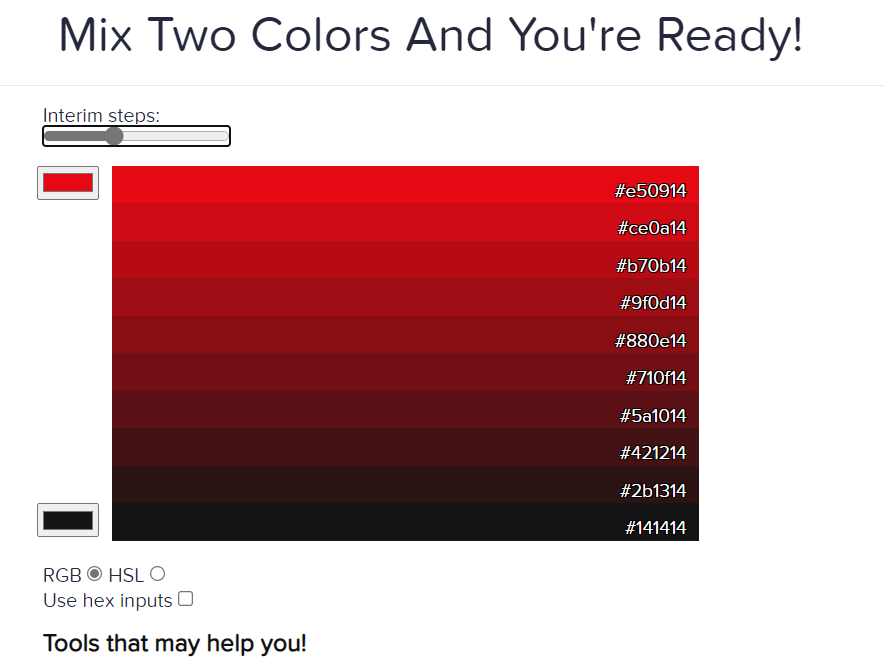

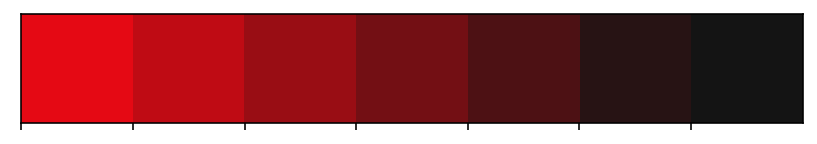

In [48]:
grad = ["#e50914", "#bf0b14", "#990d14","#730f14","#4d1114" , "#271314","#141414"]
sns.palplot(sns.color_palette(grad))
sns.set_palette(sns.color_palette(grad))

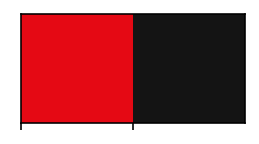

In [49]:
colors = ["#E50914", "#141414"]
sns.palplot(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))

# 1) Introduce Columns
### (1) Movie & TV Show

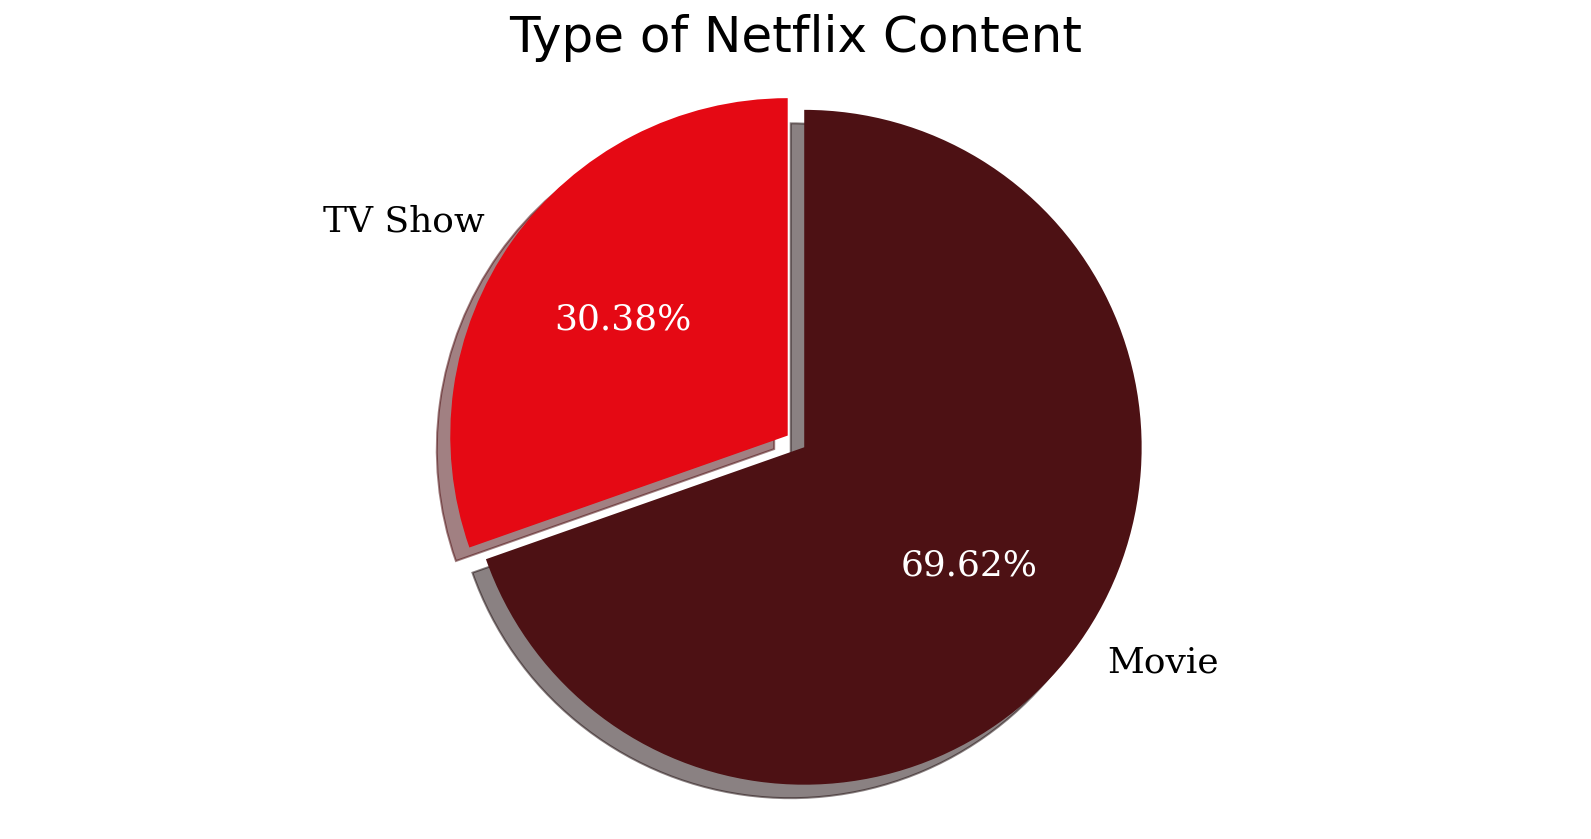

In [50]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
patches, texts, autotexts = plt.pie(
    data['type'].value_counts().sort_values(),labels=labels,explode=[0.03,0.03],
    autopct='%1.2f%%',shadow=True, 
    colors=("#e50914" ,"#4d1114"), startangle=90)

## label만 변경해주기 
for t in texts:
    t.set_color("black")
    t.set_fontproperties('serif')
    t.set_fontsize(18)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontproperties('serif')
    t.set_fontsize(18)

plt.title('Type of Netflix Content', fontsize=25)
plt.axis('equal')
plt.show()

### (2)나라별 컨텐츠 수 TOP20
- matplotlib에서 축없이 버블차트를 보기 쉽게 표현하기 위해 제공하는 클래스 BubbleChart 활용하여 나라별 추가한 컨텐츠를 표현해봄 

In [53]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            font_color = 'black' if 8 <= i <= 12 else 'white'
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',
                    color=font_color, fontsize=17)

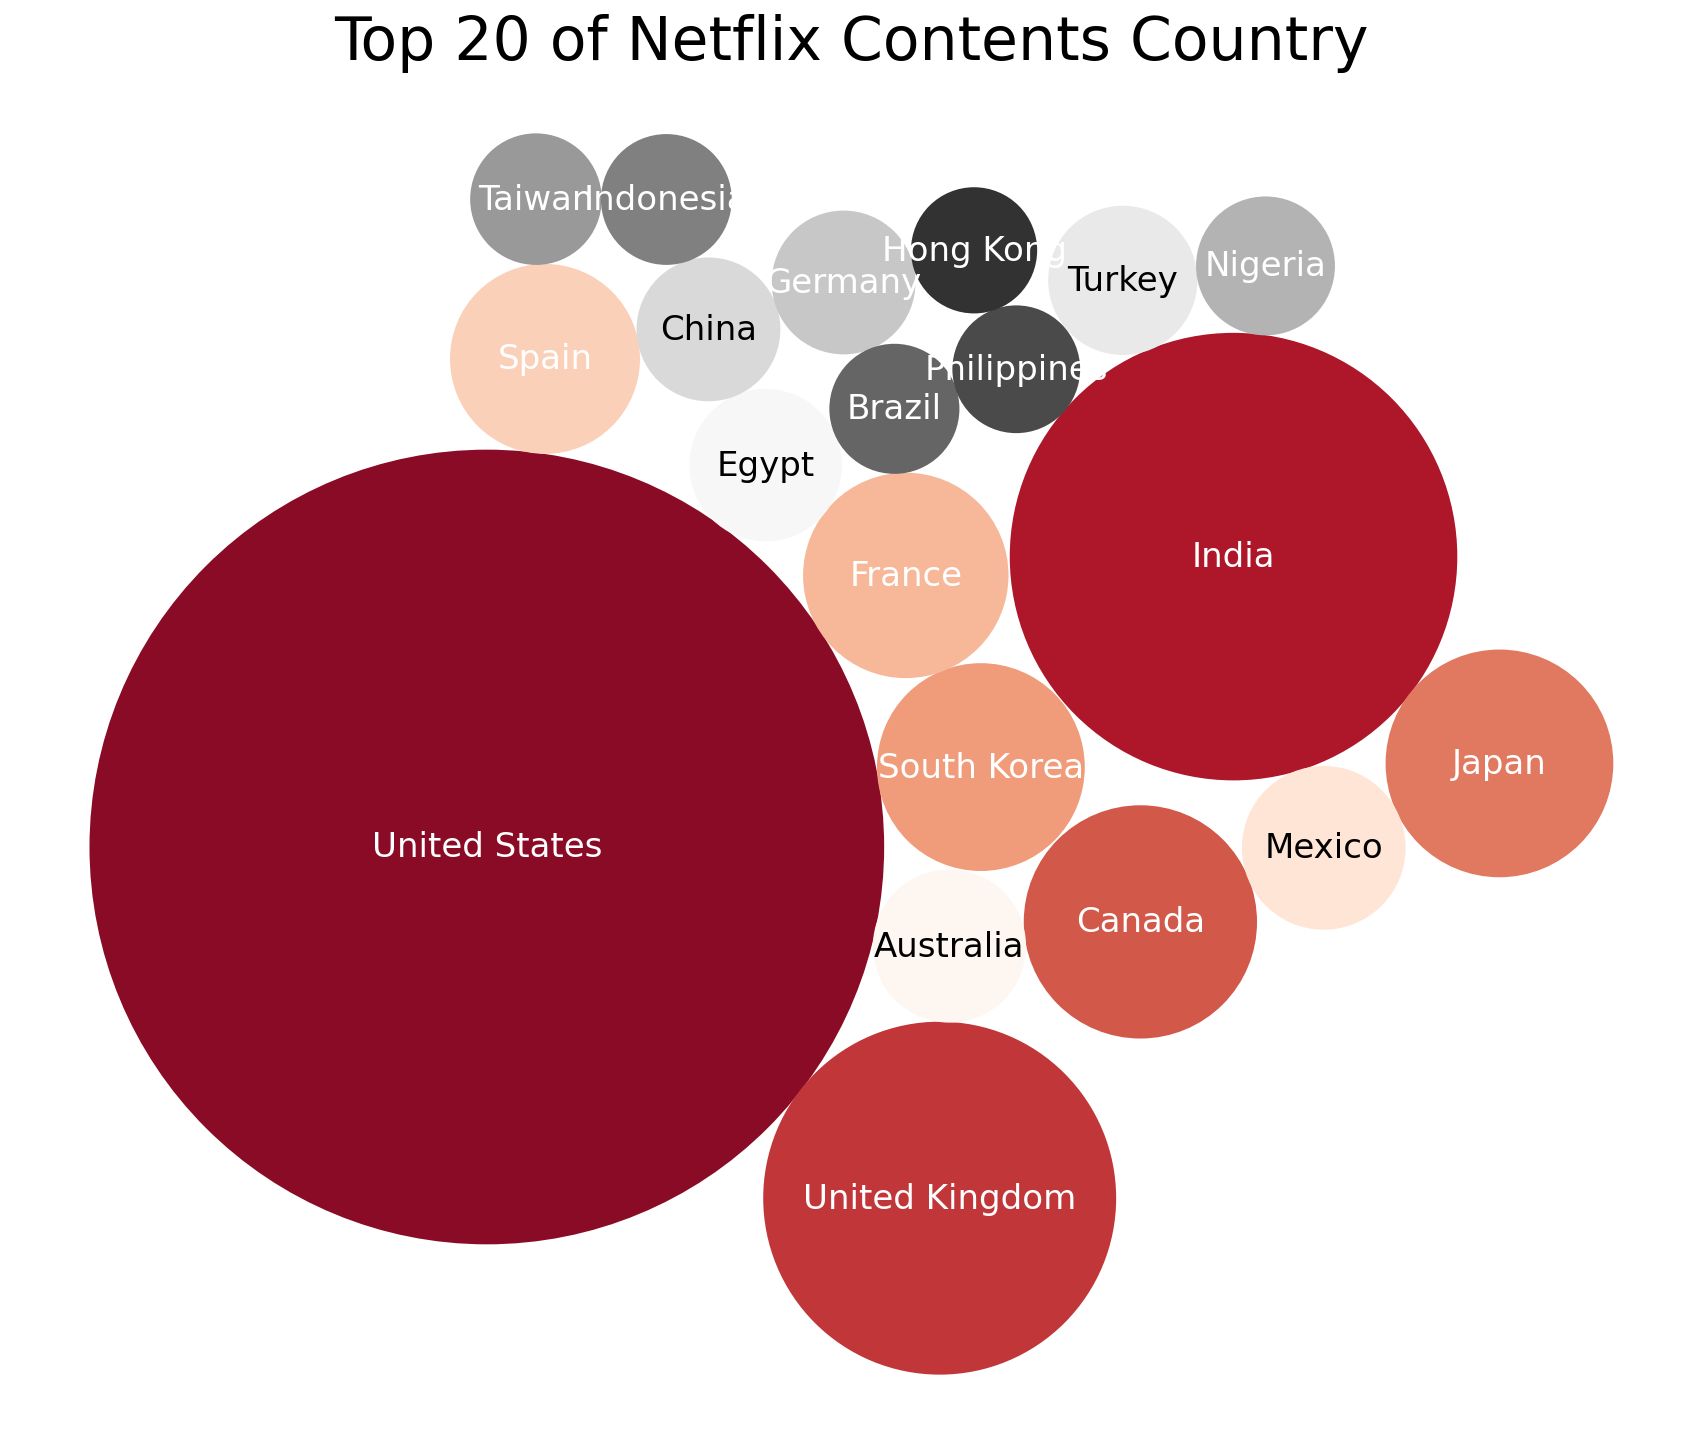

In [55]:
data_country = data['first_country'].value_counts().rename_axis('first_country').reset_index(name='counts')

bubble_chart = BubbleChart(area=data_country['counts'].head(20),
                           bubble_spacing=0.1)

bubble_chart.collapse()
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(15, 15))

bubble_chart.plot(
    ax, data_country['first_country'].head(20), sns.color_palette("RdGy", n_colors=20))

ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Top 20 of Netflix Contents Country', fontsize=30)

plt.show()

### (3)장르수  TOP15

In [56]:
tv_count =tv_genere.sort_values(by = 'count' ,ascending=False).reset_index()
tv_count = tv_count.head(15)

In [60]:
movie_count = mov_genere.sort_values(by = 'count' ,ascending=False).reset_index()
movie_count = movie_count.head(15)

In [57]:
#!pip install squarify

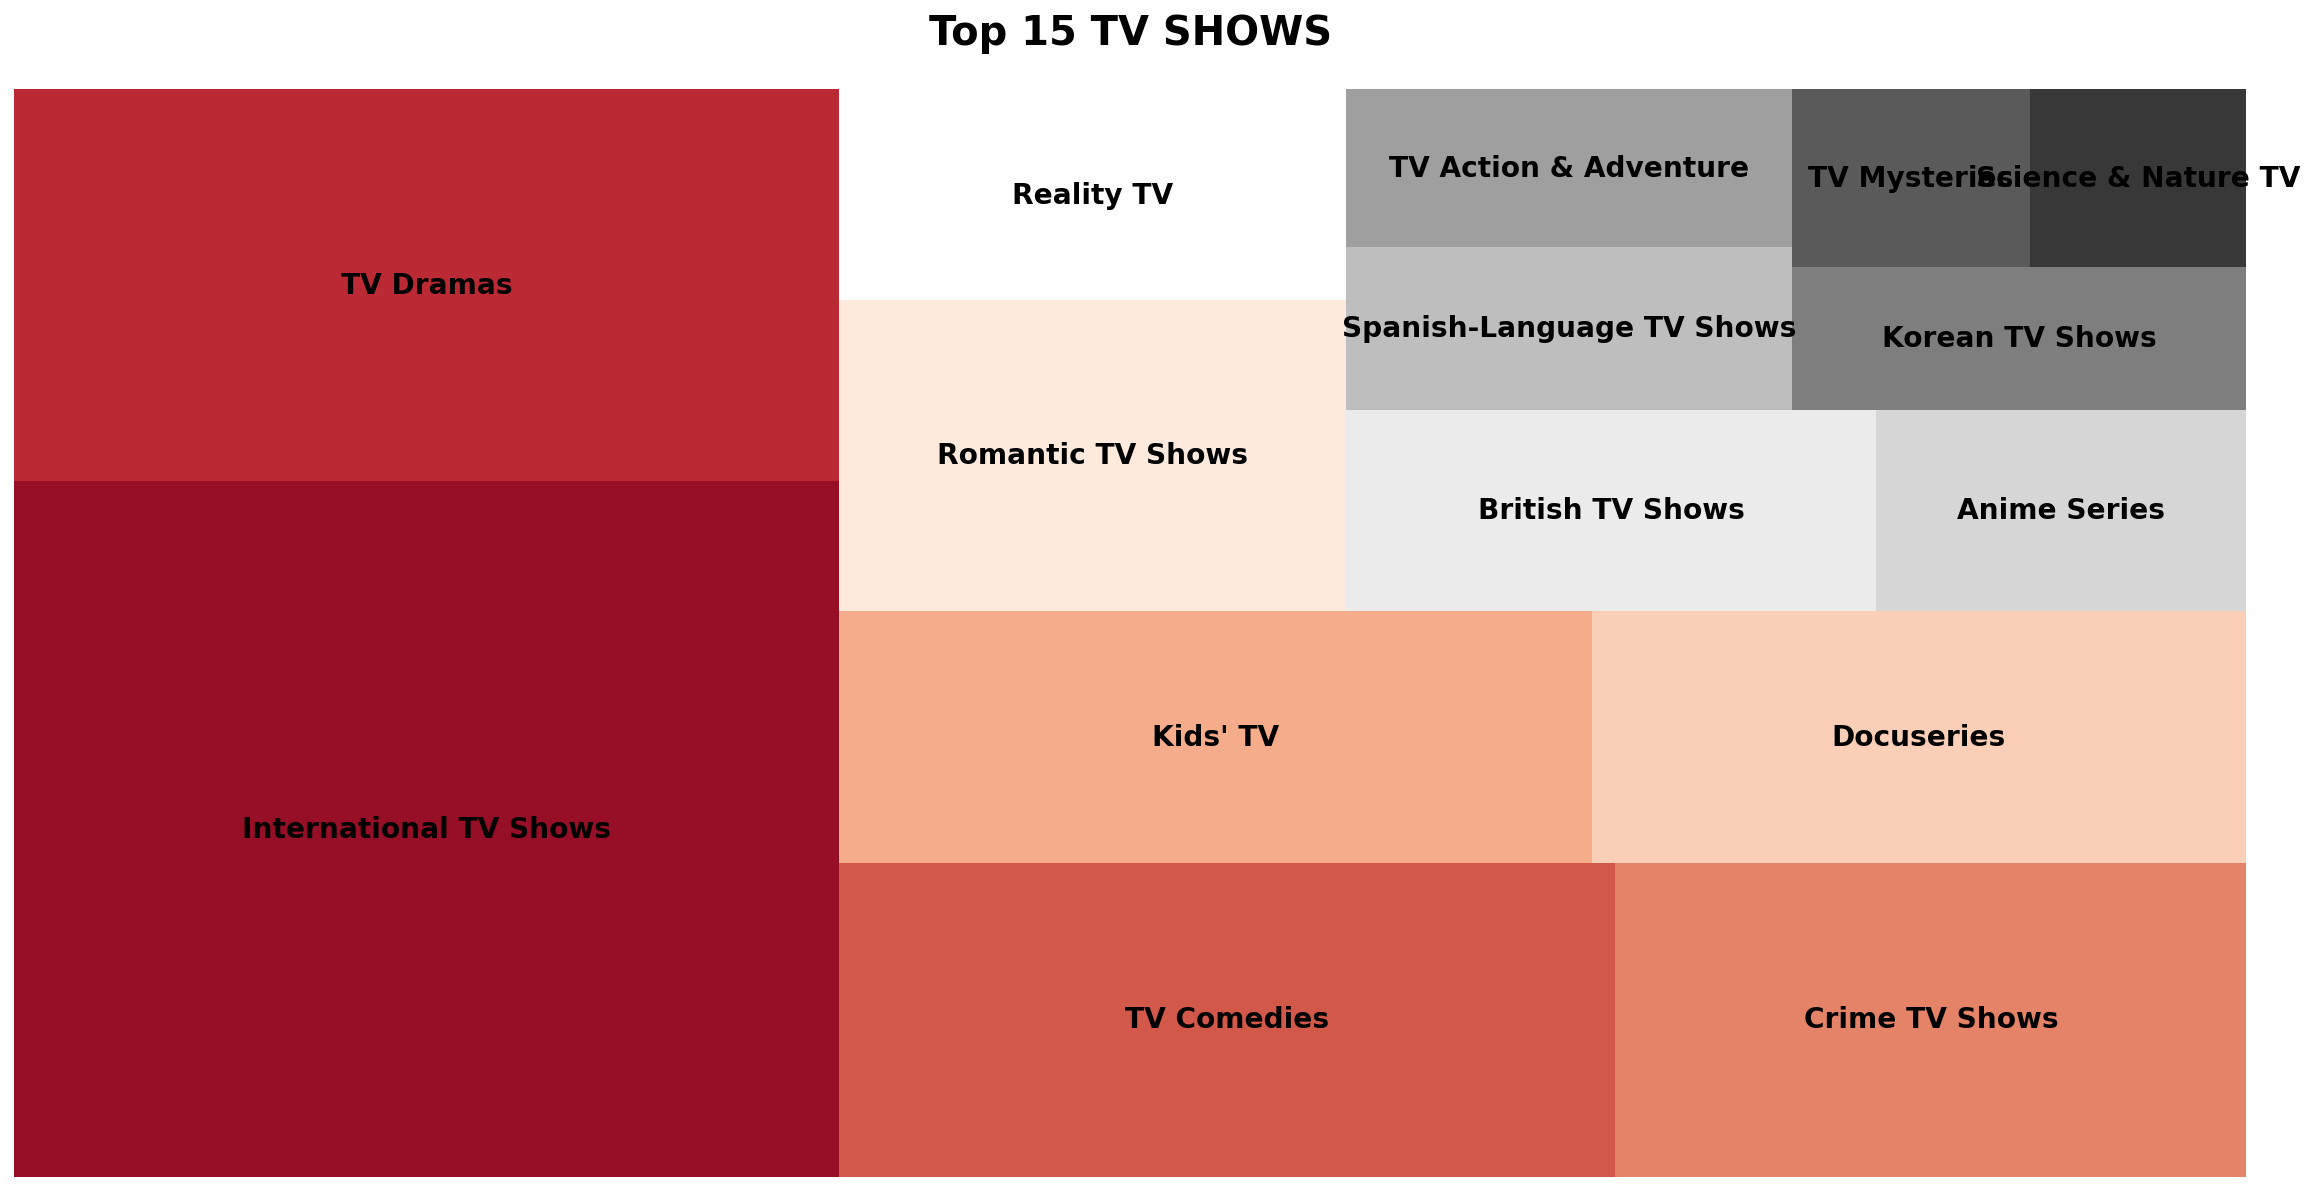

In [67]:
import matplotlib.pyplot as plt
import squarify

fig = plt.figure(figsize=(20, 10))
squarify.plot(sizes = tv_count['count'], label = tv_count['genere'], color=sns.color_palette("RdGy", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 15 TV SHOWS', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

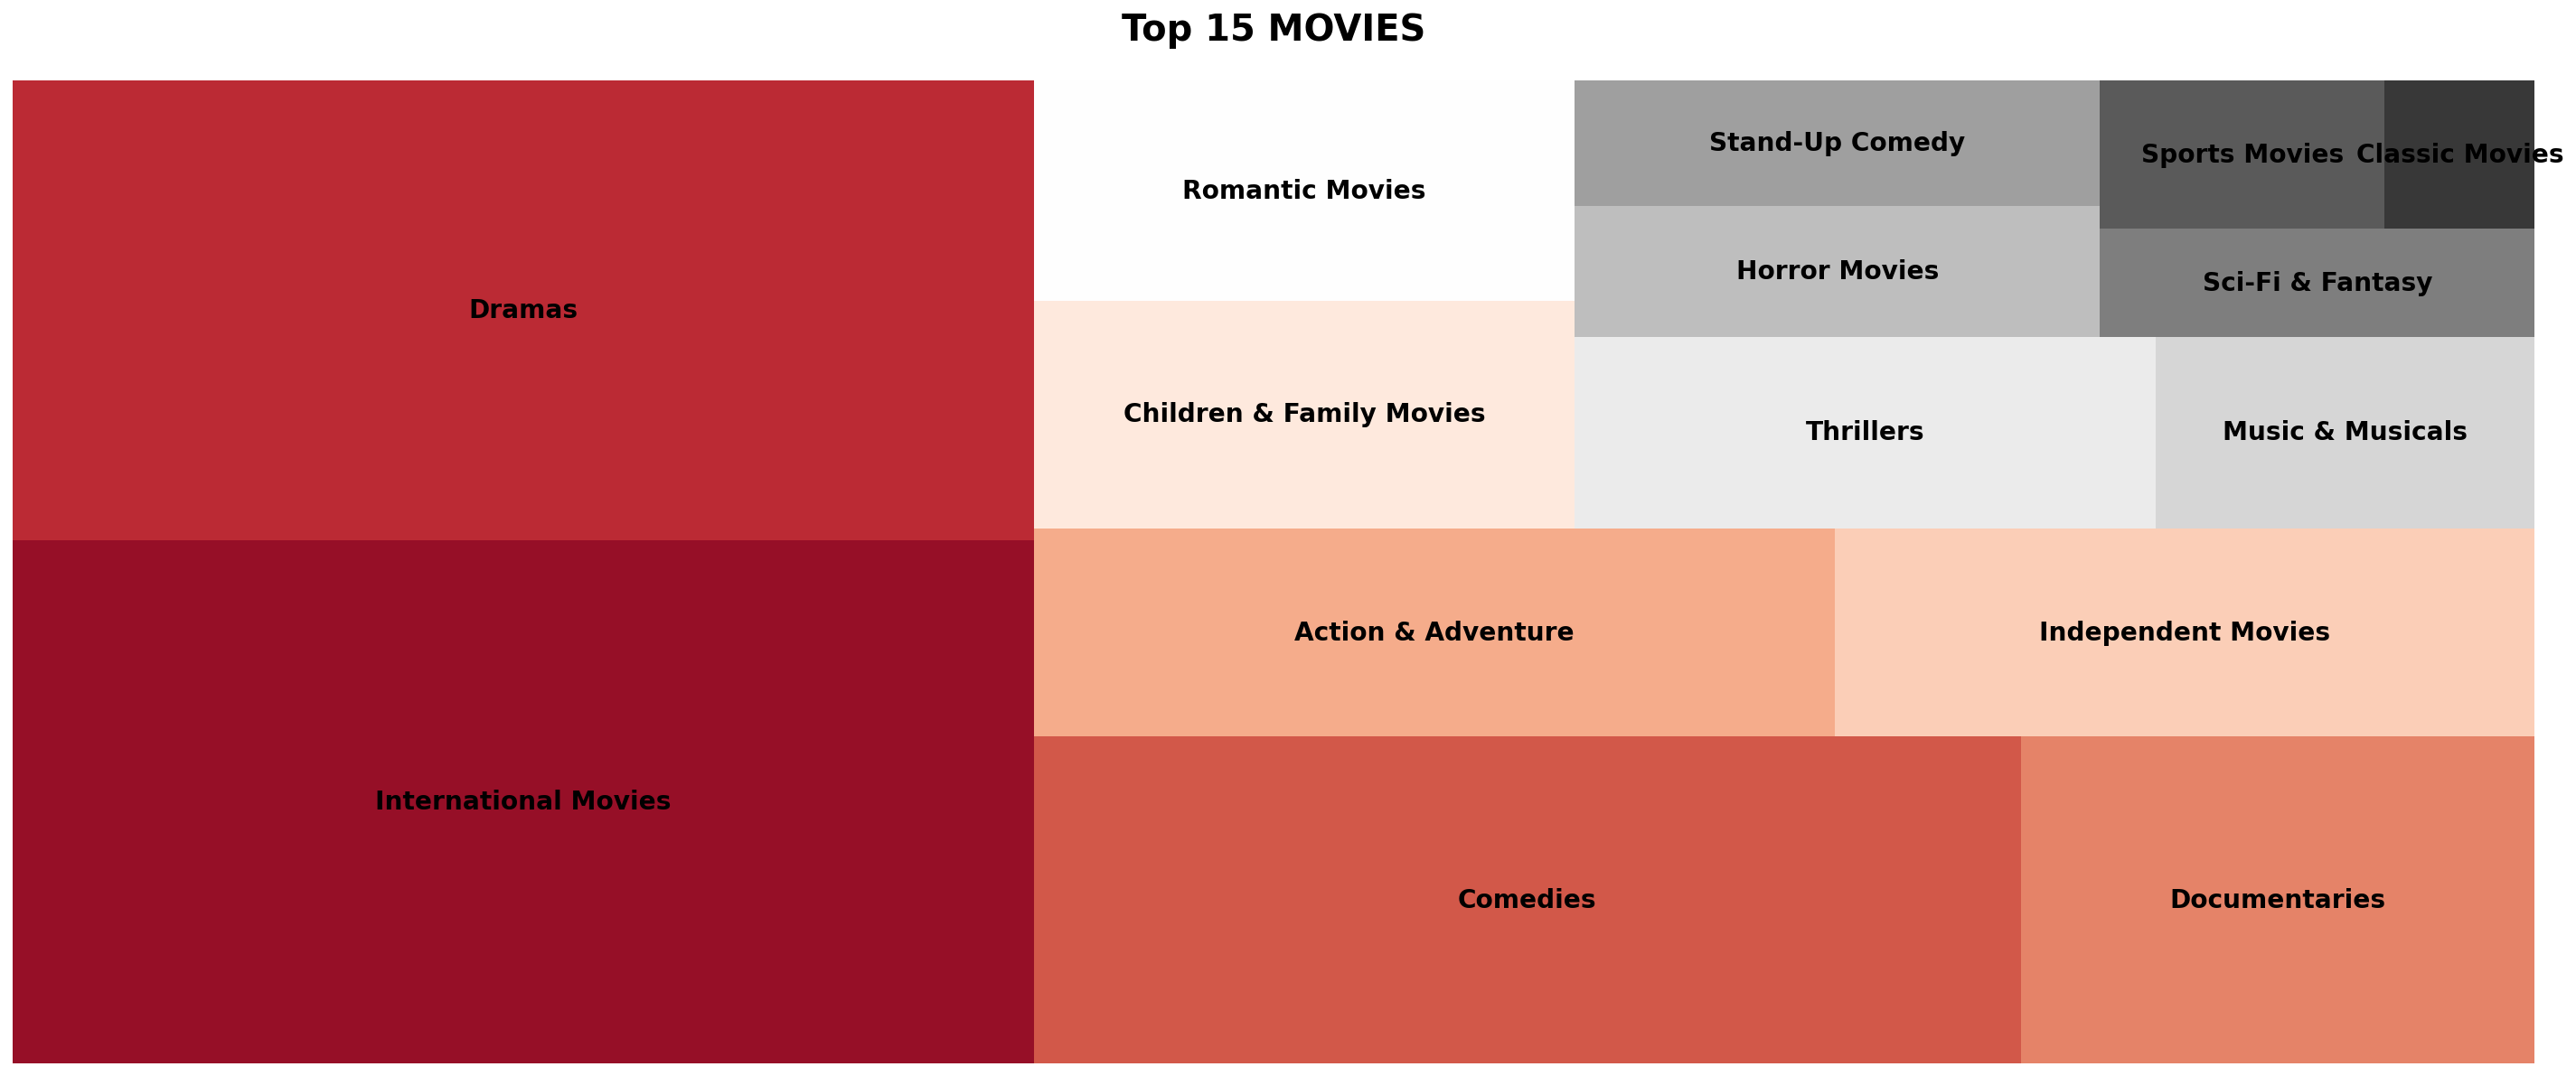

In [63]:
fig = plt.figure(figsize=(25, 10))
squarify.plot(sizes = movie_count['count'], label = movie_count['genere'], color=sns.color_palette("RdGy", n_colors=15),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 15 MOVIES', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

### (4) 연도별 추가된 컨텐츠수


In [71]:
import plotly.graph_objects as go
df_content = data['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv_year = df_tv['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_tv_year['percent'] = df_tv_year['count'].apply(lambda x : 100*x/sum(df_tv_year['count']))


df_movie_year = df_movie['year'].value_counts().reset_index().rename(columns = {
    'year' : 'count', 'index' : 'year'}).sort_values('year')
df_movie_year['percent'] = df_movie_year['count'].apply(lambda x : 100*x/sum(df_movie_year['count']))

t1 = go.Scatter(x=df_movie_year['year'], y=df_movie_year["count"], name="Movies", marker=dict(color="#4d1114"))
t2 = go.Scatter(x=df_tv_year['year'], y=df_tv_year["count"], name="TV Shows", marker=dict(color="#e50914"))
t3 = go.Scatter(x=df_content['year'], y=df_content["count"], name="Total Contents", marker=dict(color="#142FE0"))

graph_data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"), width=900, height=400)
fig = go.Figure(graph_data, layout=layout)
fig.show()

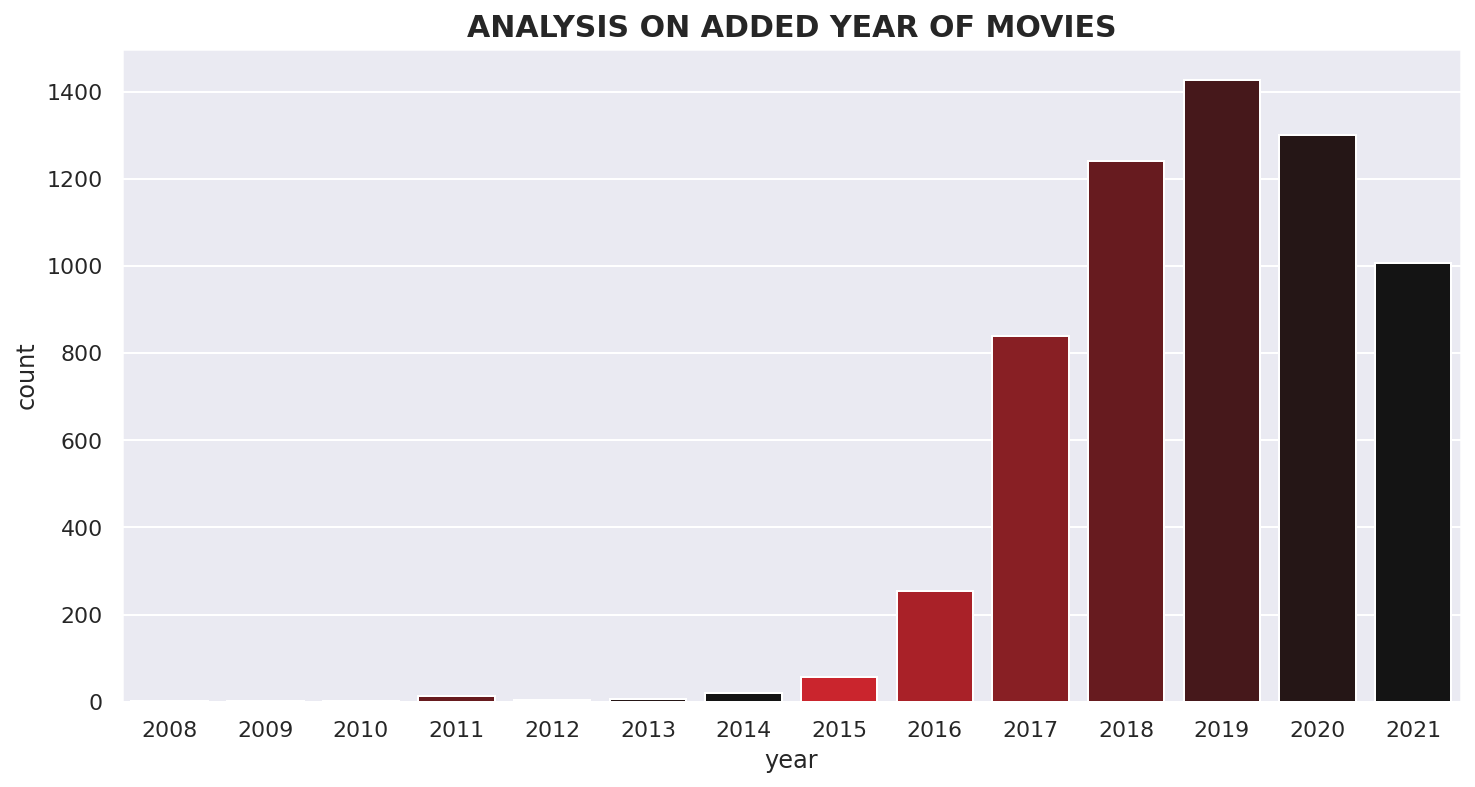

In [72]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=df_movie, palette= grad) #order=df_movies['year'].value_counts().index[1:15])

plt.title('ANALYSIS ON ADDED YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

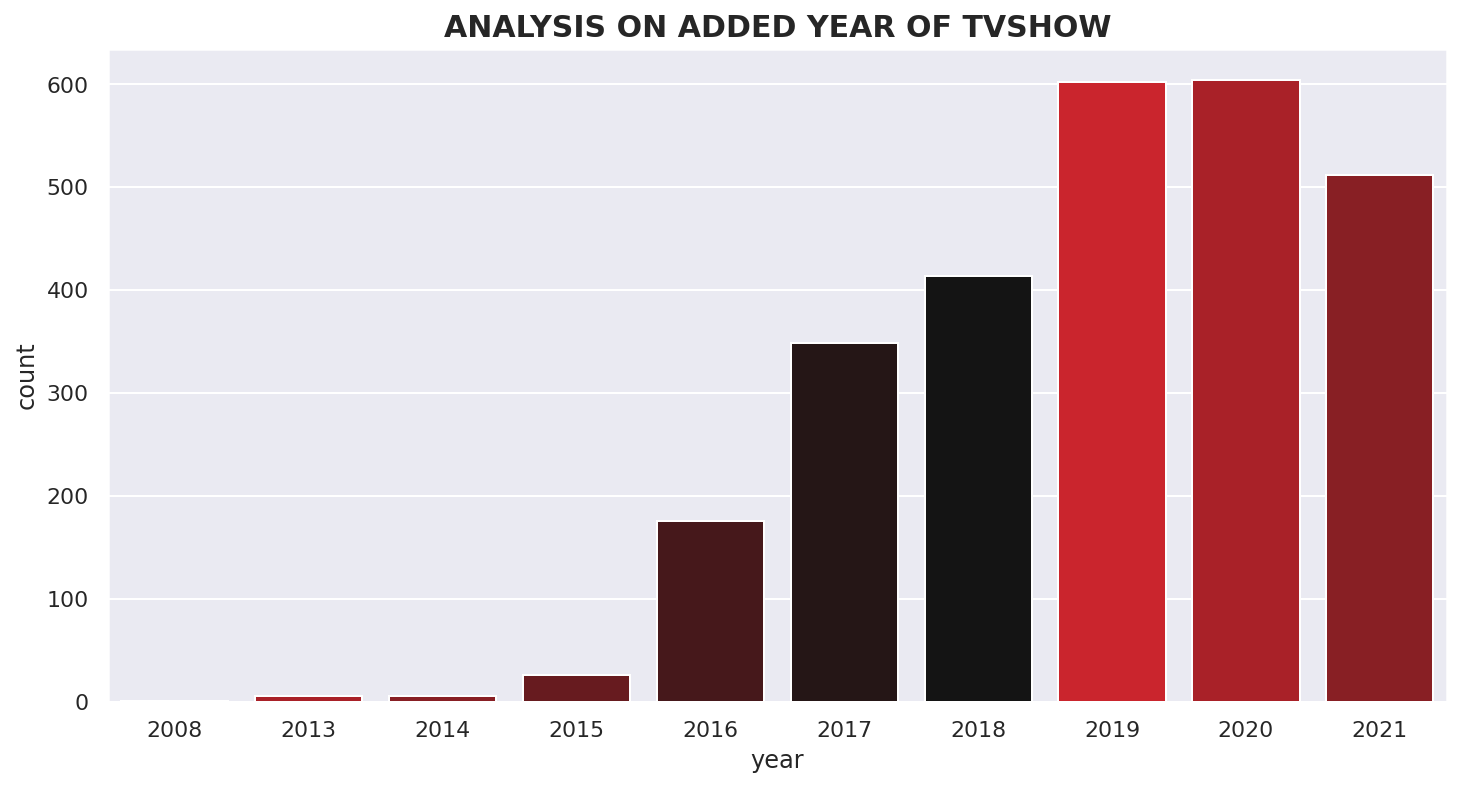

In [73]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=df_tv, palette= grad) #order=df_movies['year'].value_counts().index[1:15])

plt.title('ANALYSIS ON ADDED YEAR OF TVSHOW', fontsize=15, fontweight='bold')
plt.show()

### (5)세계로 뻗어나가는 넷플릭스

In [74]:
import plotly.express as px

# 연도, 나라에 따른 count 그룹화
year_country = data.groupby('year')['first_country'].value_counts().reset_index(name='counts')

# 연도별 비는 나라 추가
all_country = year_country['first_country'].unique()
for year in range(2008, 2022):
  years_country = year_country[year_country['year']==year]['first_country'].unique()
  add_country = np.setdiff1d(all_country, years_country)
  
  for country in add_country:
    year_country = year_country.append({'year': year, 'first_country':country, 'counts':0},ignore_index=True)

# 나라별 연도에 따른 누계값 계산
year_country = year_country.sort_values(by = ['year', 'first_country'])
year_country['cnt_csum'] = year_country.groupby(['first_country'])['counts'].cumsum()
year_country.drop(year_country.loc[year_country['cnt_csum']==0].index, inplace=True)

# 그리기
fig = px.choropleth(year_country, locations="first_country", color="cnt_csum", 
                    locationmode='country names',
                    animation_frame='year',
                    range_color=[0,400],
                    color_continuous_scale=px.colors.sequential.OrRd,
                    width = 1100, height = 600)

fig.update_layout(title='Expansion of Netflix', font_size=14)
fig.plotly_relayout
fig.show()

### 연도별, 달별 추가된 장르의 분포도 확인

In [ ]:
# 분해하여 갯수 셈
year_genre_tv = genere_2cols(df_tv, 'year')
year_genre_tv = year_genre_tv.sort_values(by=['year', 'genre'])
month_genre_tv = genere_2cols(df_tv, 'month')
month_genre_tv = month_genre_tv.sort_values(by=['month', 'genre'])

year_genre_mv = genere_2cols(df_movie, 'year')
year_genre_mv = year_genre_mv.sort_values(by=['year', 'genre'])
month_genre_mv = genere_2cols(df_movie, 'month')
month_genre_mv = month_genre_mv.sort_values(by=['month', 'genre'])

# 그룹별 높은 수 5개씩 추출
top_year_count_tv = year_genre_tv.groupby('year').apply(lambda x: x.nlargest(5, 'count'))
top_month_count_tv = month_genre_tv.groupby('month').apply(lambda x: x.nlargest(5, 'count'))
top_year_count_mv = year_genre_mv.groupby('year').apply(lambda x: x.nlargest(5, 'count'))
top_month_count_mv = month_genre_mv.groupby('month').apply(lambda x: x.nlargest(5, 'count'))

# index 삭제
top_year_count_tv = top_year_count_tv.droplevel(axis=0,level=0)
top_year_count_tv = top_year_count_tv.sort_values(by='year')
top_month_count_tv = top_month_count_tv.droplevel(axis=0,level=0)
top_month_count_tv = top_month_count_tv.sort_values(by='month')

top_year_count_mv = top_year_count_mv.droplevel(axis=0,level=0)
top_year_count_mv = top_year_count_mv.sort_values(by='year')
top_month_count_mv = top_month_count_mv.droplevel(axis=0,level=0)
top_month_count_mv = top_month_count_mv.sort_values(by='month')

# year, month 정수로 변환
top_year_count_tv = top_year_count_tv.astype({'year':'int'})
top_year_count_mv = top_year_count_mv.astype({'year':'int'})
top_month_count_tv = top_month_count_tv.astype({'month':'int'})
top_month_count_mv = top_month_count_mv.astype({'month':'int'})

In [ ]:
#연도별 장르 추가 분포도(Movie)
import altair as alt

alt.Chart(top_year_count_mv).mark_bar().encode(
    x='year:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=900,
    height=600,
    title="Added Movie's Genre by Year").configure_title(fontSize=30)


alt.Chart(...)

In [ ]:
#연도별 장르 추가 분포도(TV Show)
import altair as alt

alt.Chart(top_year_count_tv).mark_bar().encode(
    x='year:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=900,
    height=600,
    title="Added TV Show's Genre by Year").configure_title(fontSize=30)


alt.Chart(...)

In [ ]:
# 달별 장르 분포도(Movie)
alt.Chart(top_month_count_mv).mark_bar().encode(
    x='month:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=900,
    height=600,
    title="Added Movie's Genre by Month").configure_title(fontSize=30)

alt.Chart(...)

In [ ]:
# 달별 장르 분포도(TV Show)
alt.Chart(top_month_count_tv).mark_bar().encode(
    x='month:N',
    y=alt.Y('sum(count)', stack="normalize", sort="ascending"),
    color = alt.Color("genre", scale=alt.Scale(scheme='redgrey'))).properties(
    width=900,
    height=600,
    title="Added TV Show's Genre by Month").configure_title(fontSize=30)

alt.Chart(...)

### 1)장르별 평균 평점 BEST 5 시각화


In [ ]:
print(df_temp_movie.isnull().sum())
print(df_temp_tv.isnull().sum())

show_id         0
type            0
listed_in       0
IMDB         2653
IMDB_band       0
dtype: int64
show_id        0
type           0
listed_in      0
IMDB         892
IMDB_band      0
dtype: int64


In [ ]:
#별점 데이터를 이용해 시각화 
df_temp_movie = df_temp_movie.dropna(axis=0)
df_temp_tv = df_temp_tv.dropna(axis=0)

In [ ]:
df_movie_IMDB = df_temp_movie.drop(['type','IMDB'], axis=1)
df_tv_show_IMDB = df_temp_tv.drop(['type','IMDB'], axis=1)
df_movie_IMDB

,show_id,listed_in,IMDB_band
1915,s1887,Documentaries,10
836,s827,Stand-Up Comedy,9
2526,s2488,"Comedies, Dramas, International Movies",9
917,s908,Documentaries,9
3583,s3532,"Comedies, Dramas, Independent Movies",9
...,...,...,...
2663,s2625,"Comedies, International Movies",2
1120,s1107,Action & Adventure,2
4503,s4443,"Action & Adventure, Comedies, International Mo...",2
923,s914,"Dramas, International Movies, Romantic Movies",2


In [ ]:
def genere_2cols(df, col):
    
    genere_year = df[[col, 'listed_in']].value_counts()
    
    gener = {}
    
    for idx, val in genere_year.items():
        i_col = str(idx[0])
        l = idx[1].split(',')
        for i in l:
            genre_split = i.strip()
            key = i_col + ':' + genre_split
            if i in gener.keys():
                d = {}
                d[key] = val + gener[key]
                gener.update(d)
            else:
                d = {key:val}
                gener.update(d)
    cols, theme, count = [], [], []
    
    for idx, val in gener.items():
        cols.append((idx.split(':')[0]))
        theme.append(idx.split(':')[1])
        count.append(val)
    
    list_temp = (pd.DataFrame({col: cols, 'genre':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp

TV Show 장르별 counting

In [ ]:
df_tv_show_IMDB = genere_2cols(df_tv_show_IMDB,'IMDB_band')
df_tv_show_IMDB

,IMDB_band,genre,count
0,7,Kids' TV,1
1,8,TV Shows,1
2,10,Science & Nature TV,1
3,10,Docuseries,1
4,10,TV Thrillers,1
...,...,...,...
135,6,Stand-Up Comedy & Talk Shows,1
136,10,TV Mysteries,1
137,5,Stand-Up Comedy & Talk Shows,2
138,9,TV Shows,2


In [ ]:
df_tv_show_IMDB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMDB_band  140 non-null    object
 1   genre      140 non-null    object
 2   count      140 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [ ]:
df_tv_show_IMDB = df_tv_show_IMDB.astype({'IMDB_band':'int'})

In [ ]:
#df_tv_show_IMDB['genre'].value_counts()

In [ ]:
df_tv_show_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMDB_band  140 non-null    int64 
 1   genre      140 non-null    object
 2   count      140 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


장르로 그룹화해서 평점을 평균내야하는데 count값이 있어서 count를 곱해준다음에 평균내야함..

In [ ]:
df_tv_show_IMDB['total'] = (df_tv_show_IMDB['IMDB_band']*df_tv_show_IMDB['count'])
df_tv_show_IMDB

,IMDB_band,genre,count,total
0,7,Kids' TV,1,7
1,8,TV Shows,1,8
2,10,Science & Nature TV,1,10
3,10,Docuseries,1,10
4,10,TV Thrillers,1,10
...,...,...,...,...
135,6,Stand-Up Comedy & Talk Shows,1,6
136,10,TV Mysteries,1,10
137,5,Stand-Up Comedy & Talk Shows,2,10
138,9,TV Shows,2,18


In [ ]:
grouped_tv =df_tv_show_IMDB.groupby('genre')
grouped_tv = grouped_tv.mean().reset_index()
grouped_tv.drop(labels=['IMDB_band','count'],axis=1,inplace=True)
grouped_tv.columns = ['genre','mean']
grouped_tv
#df_tv_show_IMDB['mean'] = grouped['total']
#df_tv_show_IMDB

,genre,mean
0,Anime Series,7.000000
1,British TV Shows,6.500000
2,Classic & Cult TV,8.500000
3,Crime TV Shows,7.000000
4,Docuseries,7.000000
5,International TV Shows,6.000000
6,Kids' TV,8.142857
7,Korean TV Shows,7.500000
8,Reality TV,6.000000
9,Romantic TV Shows,7.000000


movie 장르별 counting

In [ ]:
df_movie_IMDB = genere_2cols(df_movie_IMDB,'IMDB_band')
df_movie_IMDB

,IMDB_band,genre,count
0,7,Stand-Up Comedy,1
1,9,Sports Movies,1
2,5,Sports Movies,1
3,3,Independent Movies,1
4,7,Cult Movies,1
...,...,...,...
128,9,Stand-Up Comedy,3
129,6,Movies,4
130,7,Movies,5
131,8,Movies,8


In [ ]:
df_movie_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMDB_band  133 non-null    object
 1   genre      133 non-null    object
 2   count      133 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


IMDB_band가 object자료형이라 계산해주려면 int로 바꿔줘야 한다.

In [ ]:
df_movie_IMDB = df_movie_IMDB.astype({'IMDB_band':'int'})

장르로 그룹화해서 평점을 평균내야하는데 count값이 있어서 count를 곱해준다음에 평균내야함..

In [ ]:
df_movie_IMDB['total'] = (df_movie_IMDB['IMDB_band']*df_movie_IMDB['count'])
df_movie_IMDB

,IMDB_band,genre,count,total
0,7,Stand-Up Comedy,1,7
1,9,Sports Movies,1,9
2,5,Sports Movies,1,5
3,3,Independent Movies,1,3
4,7,Cult Movies,1,7
...,...,...,...,...
128,9,Stand-Up Comedy,3,27
129,6,Movies,4,24
130,7,Movies,5,35
131,8,Movies,8,64


In [ ]:
grouped_mov =df_movie_IMDB.groupby('genre')
grouped_mov = grouped_mov.mean().reset_index()
grouped_mov.drop(labels=['IMDB_band','count'],axis=1,inplace=True)
grouped_mov.columns = ['genre','mean']
grouped_mov


,genre,mean
0,Action & Adventure,5.500000
1,Anime Features,7.000000
2,Children & Family Movies,6.000000
3,Classic Movies,8.000000
4,Comedies,5.500000
5,Cult Movies,6.333333
6,Documentaries,6.500000
7,Dramas,5.500000
8,Faith & Spirituality,6.000000
9,Horror Movies,6.428571


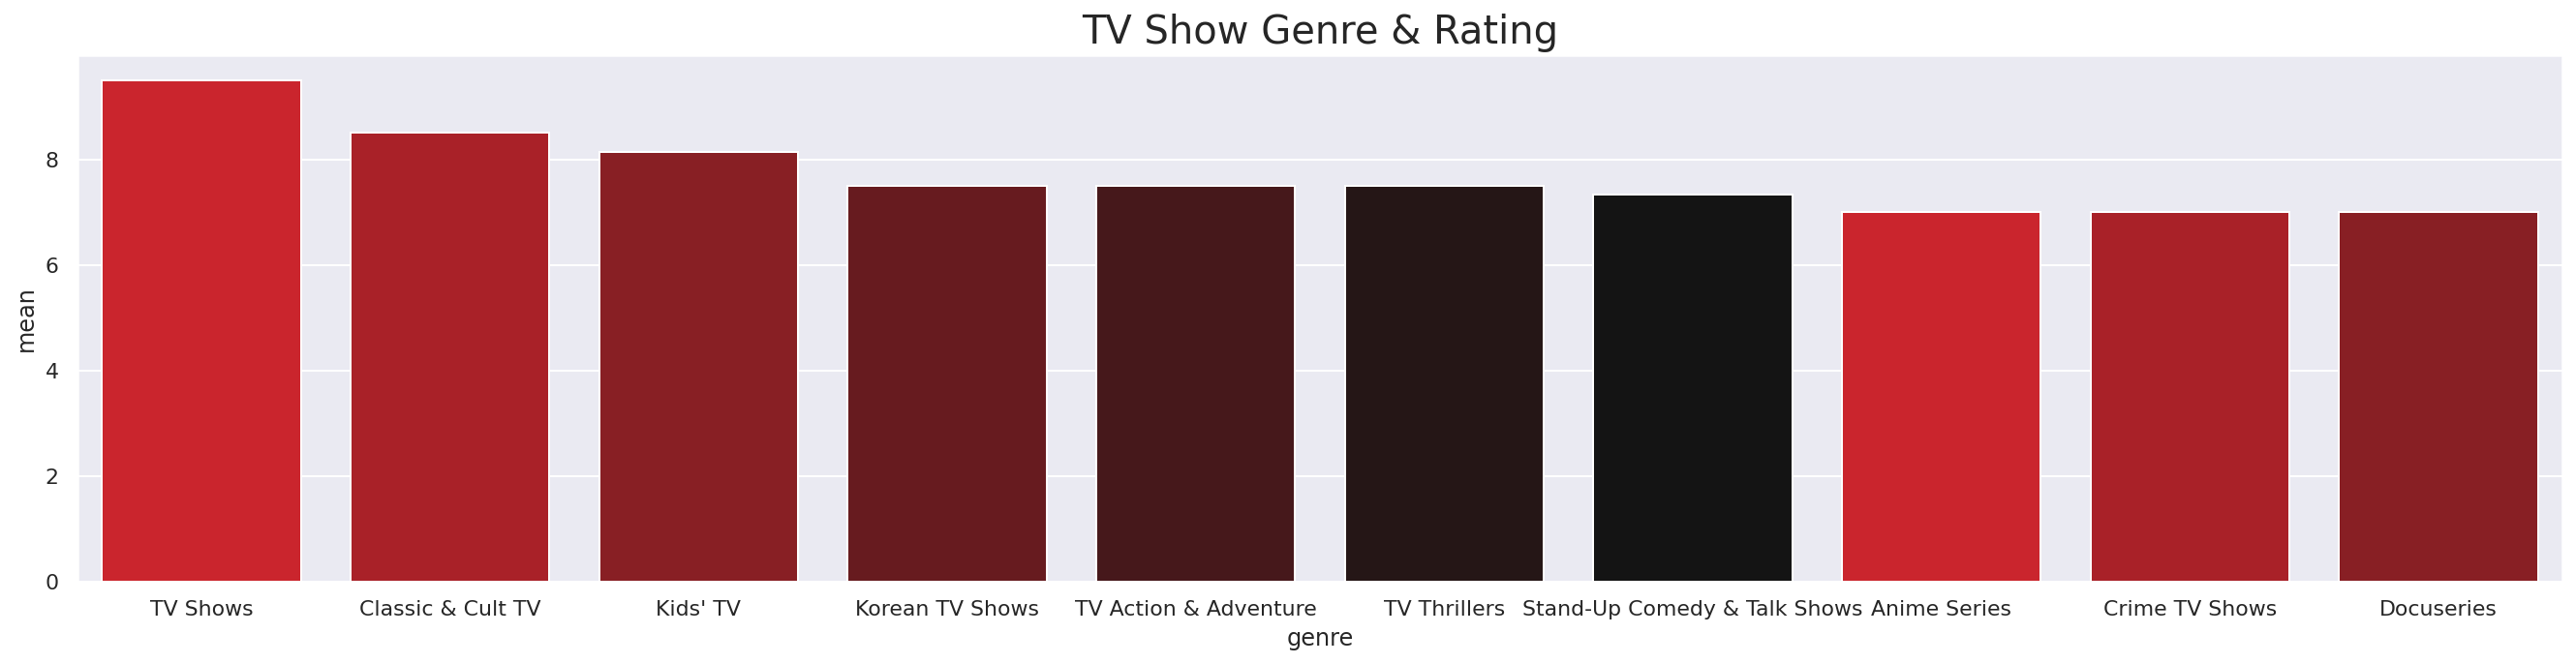

In [ ]:
plt.figure(figsize=(23,5))
plt.title('TV Show Genre & Rating', fontsize=20)
sns.barplot(data=grouped_tv.nlargest(10, 'mean'), x = "genre", y = "mean",palette = grad)
sns.set(font_scale=1)
# .nlargest(5, 'IMDB_band')

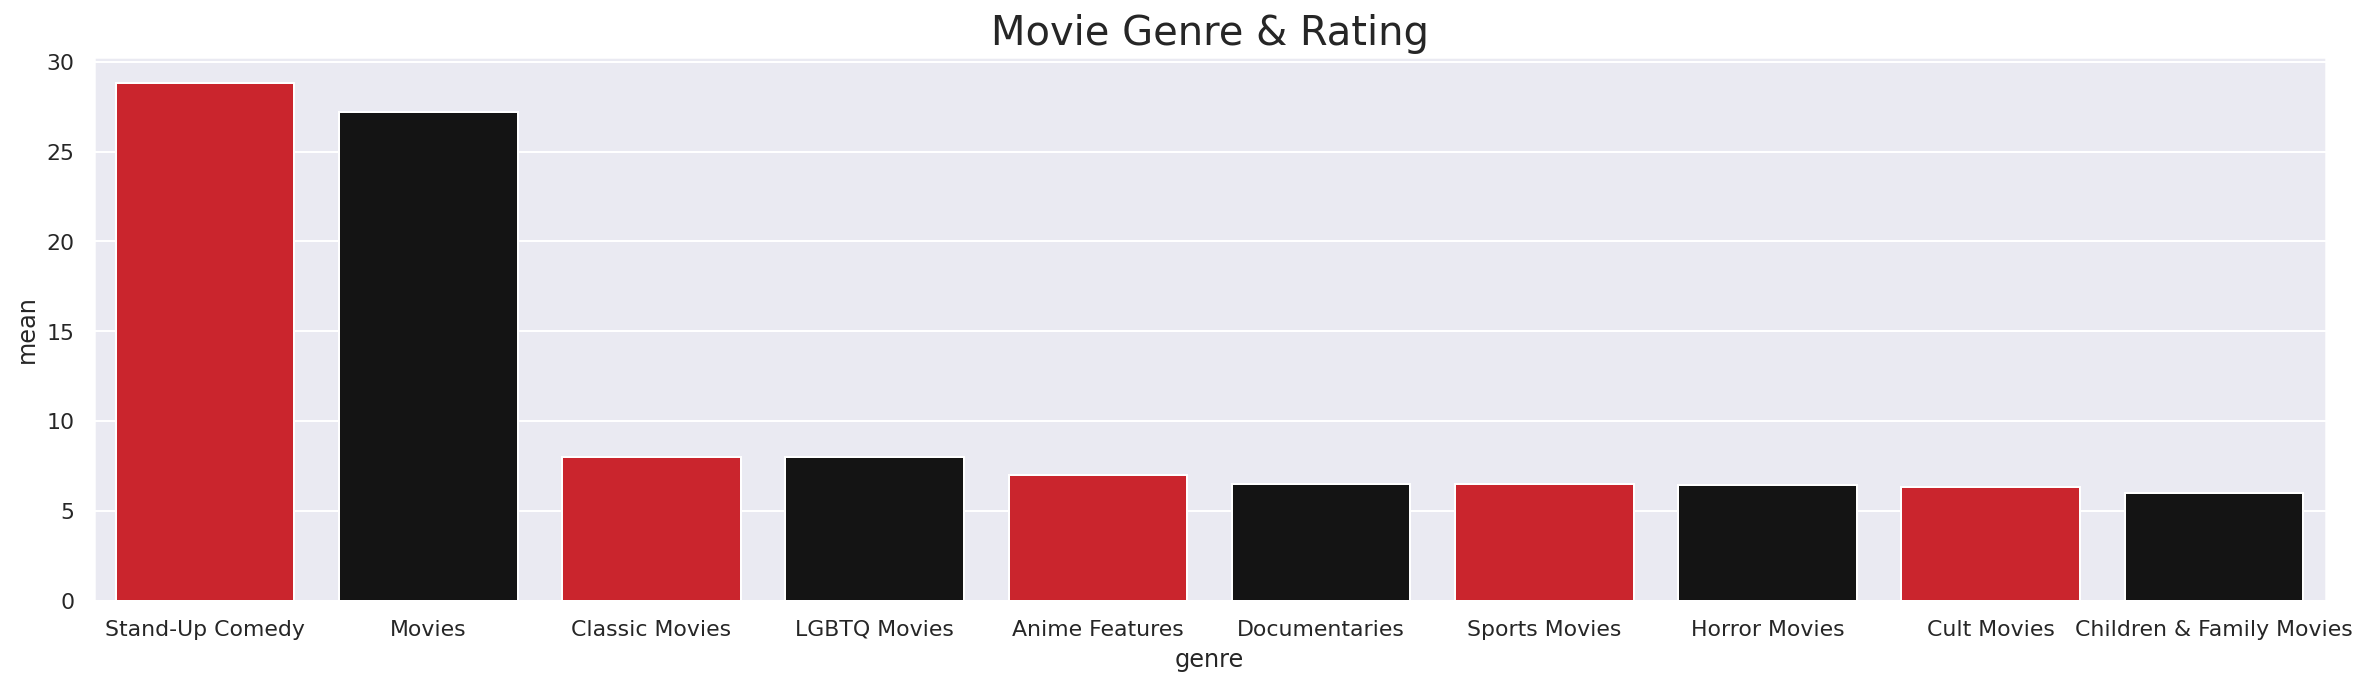

In [ ]:
plt.figure(figsize=(20,5))
#plt.ylim(8,11)
plt.title('Movie Genre & Rating', fontsize=20)
sns.barplot(data=grouped_mov.nlargest(10, 'mean'), x = "genre", y = "mean",palette = colors)
sns.set(font_scale=1)
# .nlargest(5, 'IMDB_band')

Text(0.5, 1.0, 'Year & Rating')

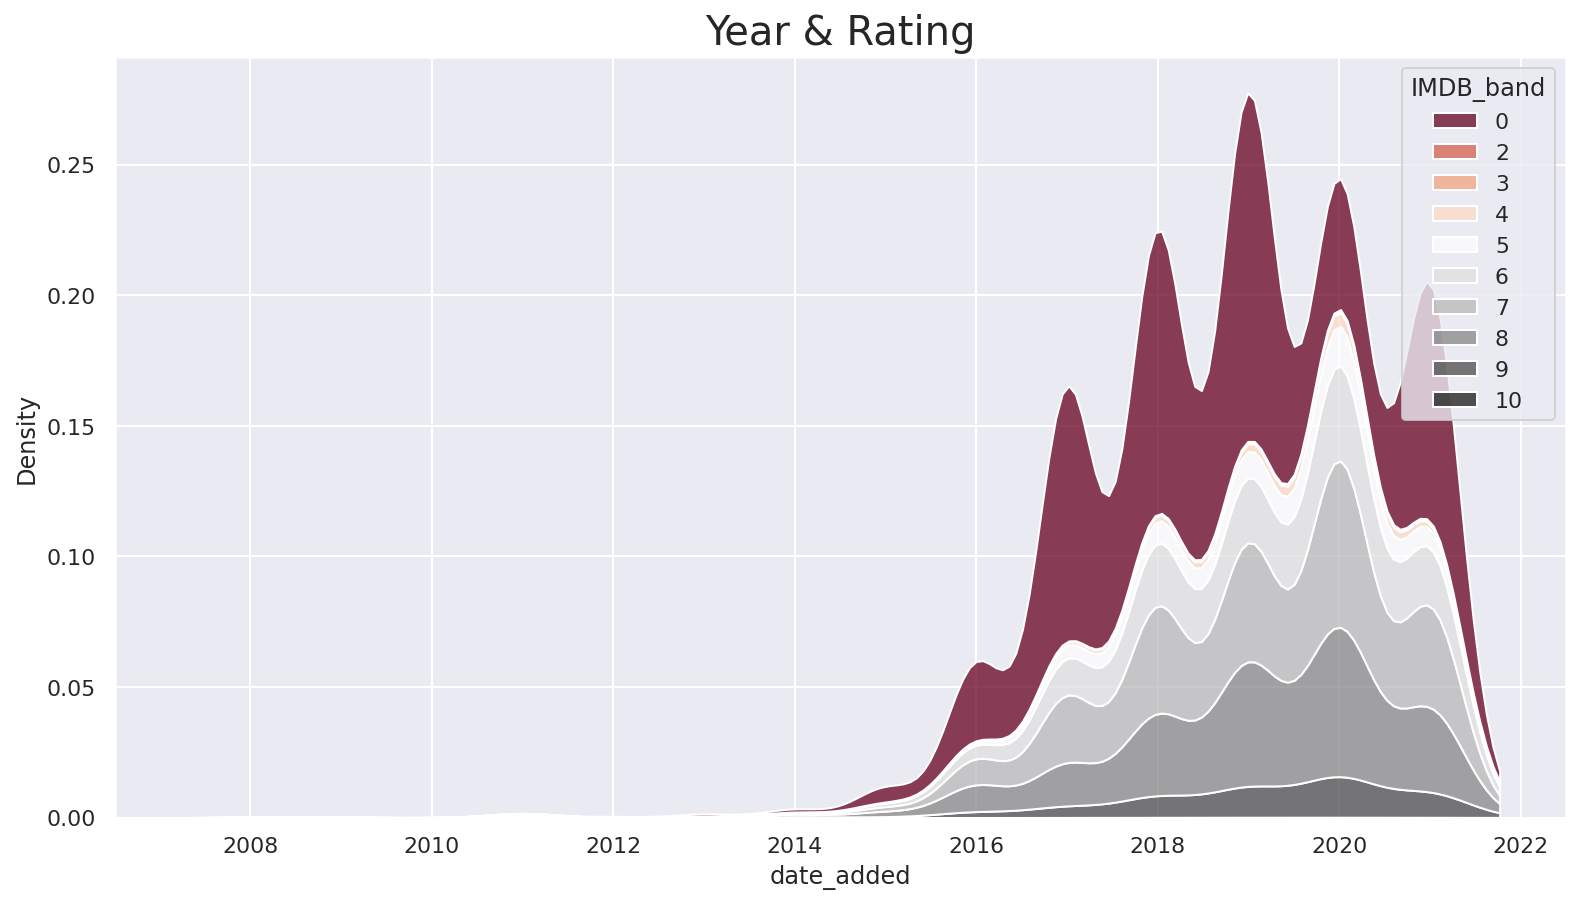

In [ ]:
plt.figure(figsize=(13,7))
sns.kdeplot(data=df_rating, x=pd.DatetimeIndex(df_rating['date_added']).year, hue = 'IMDB_band', multiple="stack", palette = 'RdGy')
plt.title('Year & Rating', fontsize=20)

영화 별점분포

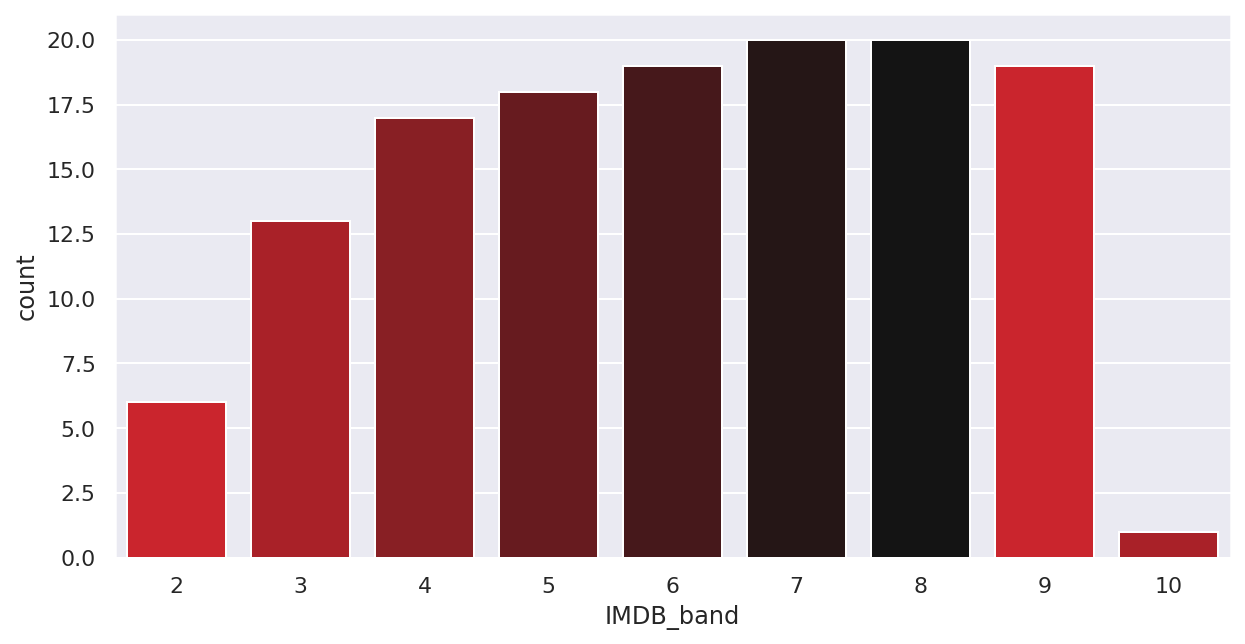

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='IMDB_band', data=df_movie_IMDB,palette = grad)

TV Show 별점분포

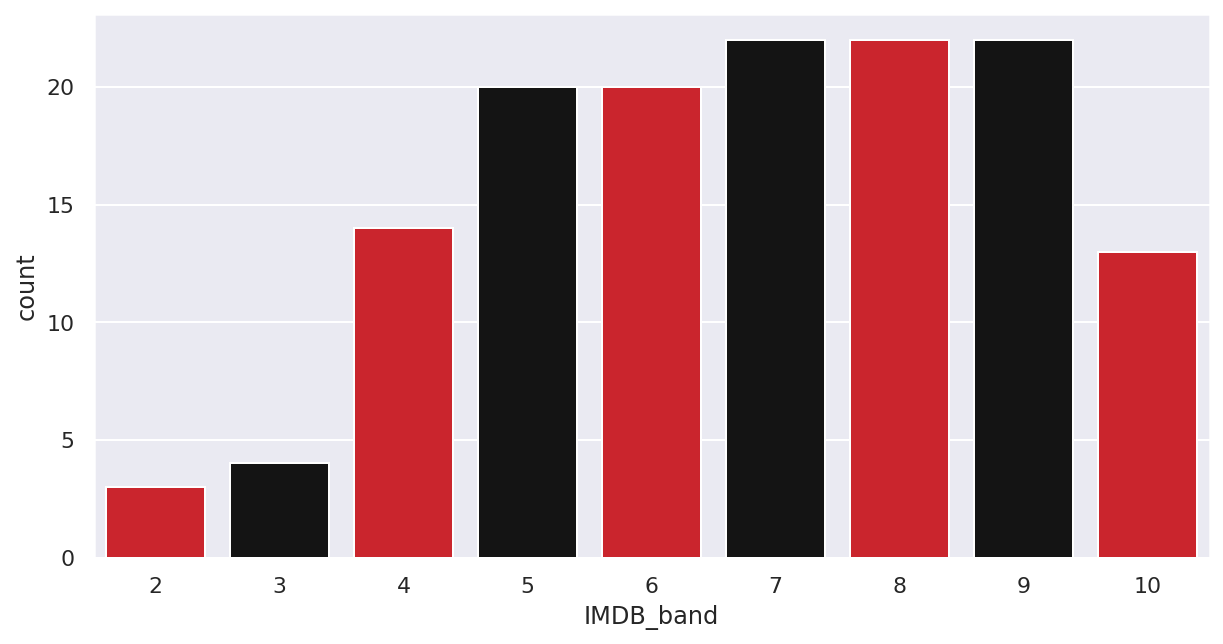

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='IMDB_band', data=df_tv_show_IMDB, palette = colors)

## *참고자료
cchoropleth를 활용한 연도, 나라별 누적 비디오 수  
https://plotly.com/python/choropleth-maps/